In [1]:
import netCDF4
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors # For truncate_colormap()
import cmocean

In [2]:
P25_age = netCDF4.Dataset('/archive/ogrp/CMIP6/OMIP/warsaw_201803_mom6_2018.04.06/OM4p25_IAF_BLING_CFC_csf/'+
                          'gfdl.ncrc4-intel16-prod/pp/ocean_annual_z/ts/annual/20yr/ocean_annual_z.1988-2007.agessc.nc')
P5_age = netCDF4.Dataset('/archive/oar.gfdl.bgrp-account/CMIP6/OMIP/warsaw_201803_mom6_2018.04.11/'+
                         'OM4p5_IAF_BLING_CFC_abio_csf_mle200/'+
                         'gfdl.ncrc4-intel16-prod/pp/ocean_annual_z/ts/annual/20yr/ocean_annual_z.1988-2007.agessc.nc')
P5N_age = netCDF4.Dataset('/archive/oar.gfdl.bgrp-account/CMIP6/OMIP/warsaw_201803_mom6_2018.04.11/'+
                          'OM4p5_IAF_BLING_CFC_abio_csf_p25config/'+
                          'gfdl.ncrc4-intel16-prod/pp/ocean_annual_z/ts/annual/20yr/ocean_annual_z.1988-2007.agessc.nc')
P5E_age = netCDF4.Dataset('/archive/oar.gfdl.bgrp-account/CMIP6/OMIP/warsaw_201803_mom6_2018.04.11/'+
                         'OM4p5_IAF_BLING_CFC_abio_csf_mle500/'+
                         'gfdl.ncrc4-intel16-prod/pp/ocean_annual_z/ts/annual/20yr/ocean_annual_z.1988-2007.agessc.nc')
P25_vol = netCDF4.Dataset('/archive/ogrp/CMIP6/OMIP/warsaw_201803_mom6_2018.04.06/OM4p25_IAF_BLING_CFC_csf/'+
                          'gfdl.ncrc4-intel16-prod/pp/ocean_annual_z/av/annual_20yr/ocean_annual_z.1988-2007.ann.nc')
P5_vol = netCDF4.Dataset('/archive/oar.gfdl.bgrp-account/CMIP6/OMIP/warsaw_201803_mom6_2018.04.11/'+
                         'OM4p5_IAF_BLING_CFC_abio_csf_mle200/'+
                         'gfdl.ncrc4-intel16-prod/pp/ocean_annual_z/av/annual_20yr/ocean_annual_z.1988-2007.ann.nc')
P25_area = netCDF4.Dataset('/archive/gold/datasets/OM4_025/mosaic.v20170622.unpacked/ocean_static_masked_area.nc')
P5_area = netCDF4.Dataset('/archive/gold/datasets/OM4_05/mosaic_ocean.v20180227.unpacked/ocean_static_masked_area.nc')

In [3]:
P25_volume = P25_vol.variables['volcello'][0].sum()
print('P25 ocean volume =',P25_volume,'m3', P25_volume/1e9,'km3')
P5_volume = P5_vol.variables['volcello'][0].sum()
print('P5 ocean volume =',P5_volume,'m3', P5_volume/1e9,'km3')

P25 ocean volume = 1.335104e+18 m3 1335103984.2595634 km3
P5 ocean volume = 1.3348147e+18 m3 1334814675.262505 km3


In [4]:
max_age = P25_age.variables['time_bnds'][-1,1]/365
print('Max age =',max_age,'years')

Max age = 300.0 years


In [5]:
def agefrac_dxdz(age_file, volume_file, area_file, depth =2500):
    """Integrates age fraction in x and z below depth"""
    age_frac = 1 - age_file.variables['agessc'][-1]/max_age
    dxdz = volume_file.variables['volcello'][0]/area_file.variables['dyt'][:]
    dz = age_file.variables['z_i'][1:] - age_file.variables['z_i'][:-1]
    wgt = numpy.maximum(0, numpy.minimum(1, ( age_file.variables['z_i'][1:] - depth ) /dz))
    return ( (age_frac * dxdz).sum(axis=-1).T * wgt ).sum(axis=-1)

In [6]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    return matplotlib.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(numpy.linspace(minval, maxval, n)))

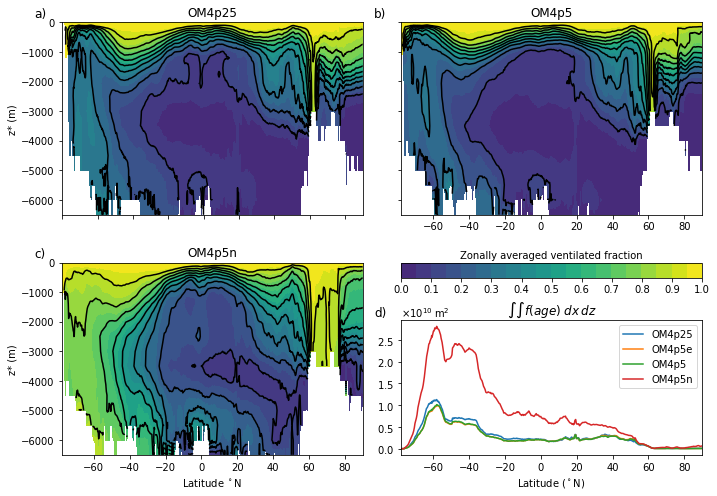

In [7]:
plt.figure(figsize=(10,7))
CIs,CI2s,cm = numpy.arange(0,1.05,.05), numpy.arange(0,1.1,.1), truncate_colormap(plt.cm.viridis,minval=.1)

plt.subplot(221)
plt.contourf(P25_age.variables['yh'][:], -P25_age.variables['z_l'][:],
            1 - P25_age.variables['agessc'][-1].mean(axis=-1)/max_age, CIs, cmap=cm)
plt.contour(P25_age.variables['yh'][:], -P25_age.variables['z_l'][:],
            1 - P25_age.variables['agessc'][-1].mean(axis=-1)/max_age, CI2s, colors='k');
#plt.xlabel('Latitude $^\circ$N');
plt.ylabel('z* (m)');
plt.title('OM4p25');
plt.text(-.09,1.028,'a)',fontsize=12,transform=plt.gca().transAxes)
plt.gca().set_xticklabels('');

plt.subplot(222)
plt.contourf(P5_age.variables['yh'][:], -P5_age.variables['z_l'][:],
            1 - P5_age.variables['agessc'][-1].mean(axis=-1)/max_age, CIs, cmap=cm)
plt.contour(P5_age.variables['yh'][:], -P5_age.variables['z_l'][:],
            1 - P5_age.variables['agessc'][-1].mean(axis=-1)/max_age, CI2s, colors='k');
#plt.xlabel('Latitude $^\circ$N');
#plt.ylabel('z* (m)');
plt.title('OM4p5');
plt.text(-.09,1.028,'b)',fontsize=12,transform=plt.gca().transAxes)
plt.gca().set_yticklabels('');

plt.subplot(223)
im = plt.contourf(P5N_age.variables['yh'][:], -P5N_age.variables['z_l'][:],
            1 - P5N_age.variables['agessc'][-1].mean(axis=-1)/max_age, CIs, cmap=cm)
plt.contour(P5N_age.variables['yh'][:], -P5N_age.variables['z_l'][:],
            1 - P5N_age.variables['agessc'][-1].mean(axis=-1)/max_age, CI2s, colors='k');
plt.xlabel('Latitude $^\circ$N');
plt.ylabel('z* (m)');
plt.title('OM4p5n');
plt.text(-.09,1.028,'c)',fontsize=12,transform=plt.gca().transAxes)
xl = plt.xlim()

ax = plt.subplot(224)
plt.plot(P25_age.variables['yh'][:], agefrac_dxdz(P25_age,P25_vol,P25_area), label='OM4p25' );        
plt.plot(P5N_age.variables['yh'][:], agefrac_dxdz(P5E_age,P5_vol,P5_area), label='OM4p5e' );
plt.plot(P5_age.variables['yh'][:], agefrac_dxdz(P5_age,P5_vol,P5_area), label='OM4p5' );
plt.plot(P5N_age.variables['yh'][:], agefrac_dxdz(P5N_age,P5_vol,P5_area), label='OM4p5n' );
plt.xlim(xl)
plt.ticklabel_format(style='sci', axis='y',useMathText=True)
plt.legend();
#plt.ylabel('$m^2$');
plt.xlabel('Latitude ($^\circ$N)');
plt.title('$\int\int f(age) \; dx \, dz$');
plt.yticks(numpy.arange(0,3,.5)*1e10);
plt.text(-.09,1.028,'d)',fontsize=12,transform=plt.gca().transAxes)
plt.text(.11,1.026,'m$^2$',fontsize=10,transform=plt.gca().transAxes)

plt.tight_layout()
# Shrink line plot
bb = ax.get_position()
ax.set_position([bb.x0, bb.y0, bb.x1-bb.x0, (bb.y1-bb.y0)*.7])
# Add colorbar
cbar_ax = plt.gcf().add_axes([bb.x0, bb.y1-.03, bb.x1-bb.x0, 0.03]);
cb = plt.gcf().colorbar(im, cax=cbar_ax, ticks=CI2s, orientation='horizontal');
cb.ax.xaxis.set_label_position('top');
cl = cb.set_label('Zonally averaged ventilated fraction');

plt.savefig('ideal-age-ventilation.png')

In [8]:
# Make sure p5 and p5e differ
# plt.plot( agefrac_dxdz(P5E_age,P5_vol,P5_area) );
# plt.plot( agefrac_dxdz(P5_age,P5_vol,P5_area) );

In [9]:
# Make sure p5 and p5e differ
# plt.contourf(P5_age.variables['yh'][:], -P5_age.variables['z_l'][:],
#             P5E_age.variables['agessc'][-1].mean(axis=-1)/max_age -
#             P5_age.variables['agessc'][-1].mean(axis=-1)/max_age
#              , cmap=cm);
# plt.colorbar();